## Pyber Ride Sharing Data Analysis

Analysis:

-	Fare cost correlates to the amount of drivers available in a city. More drivers available means lower fare cost; while lower amount of drivers usually means higher fare costs.


-	A large amount of rides are taken in urban areas – which is heavily influence by large amount of available drivers in urban areas (77% of all drivers come from urban areas). A conclusion can be made that more drivers allows for more rides.


-	The inverse of this previous point is also true – less drivers means less rides. Out of the three area types, rural area ranks the lowest in terms of both driver and ride total. This does not necessarily mean that there is a lack of a market share in rural areas, but rather that there could a demand that is not being met due to lack of drivers. 
      - There is clearly a demand for rideshare since the market is willing to pay a high fare cost in rural areas. 



In [39]:
# Importing libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

from matplotlib.legend_handler import HandlerLine2D

In [40]:
# CSV reading
csv_data_city = os.path.join('city_data.csv')
csv_data_ride = os.path.join('ride_data.csv')

city_data_df = pd.read_csv(csv_data_city)
ride_data_df = pd.read_csv(csv_data_ride)


# Output City header
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [41]:
# Output Rider header
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [42]:
# Merging all data into one df
city_ride_df = pd.merge(ride_data_df, city_data_df, on = "city", how="outer")
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [43]:
city_data_unique = city_ride_df.loc[:, ["city", "driver_count", "type"]]

city_data_unique = city_data_unique.drop_duplicates(['city'])

city_data_unique.head()

,city,driver_count,type
0,Sarabury,46,Urban
27,South Roy,35,Urban
49,Wiseborough,55,Urban
68,Spencertown,68,Urban
94,Nguyenbury,8,Urban


In [44]:
# number of of rides per city
num_rides = ride_data_df.groupby(["city"])["ride_id"].count()

num_rides_df = pd.DataFrame({"num_rides": num_rides})


num_rides_df = num_rides_df.reset_index()

num_rides_df.head()
# num_rides_df = num_rides_df.drop_duplicates(subset = 'city')
# num_rides_df.loc[num_rides_df['city'] == 'Port James'] #sanity check

,city,num_rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [45]:
# add column for mean fares after grouping df by city

mean_fare = city_ride_df.groupby(["city"])["fare"].mean()


#Create a dataframe to hold the city, driver count, and mean fare
#summary_table = city_data_unique
#summary_table["mean_fare"] = mean_fare


mean_fare_df = pd.DataFrame({"mean_fare": mean_fare})
mean_fare_df = mean_fare_df.reset_index()
mean_fare_df.head()

# mean_fare_df.loc[mean_fare_df['city'] == 'Port James']

,city,mean_fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [46]:
# Combining into ultimate dataframe
merged_df = pd.merge(city_data_unique, mean_fare_df, on= "city", how="outer")
merged_df = pd.merge(merged_df, num_rides_df, on= "city", how="outer")
merged_df.head()

# Dataframes for each area type
urban_df = merged_df.loc[merged_df['type'] == 'Urban']
suburban_df = merged_df.loc[merged_df['type'] == 'Suburban']
rural_df = merged_df.loc[merged_df['type'] == 'Rural']

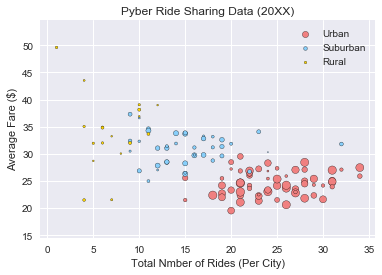

In [47]:
# Setting something in 
sns.set()

# Labels
plt.title("Pyber Ride Sharing Data (20XX)")
plt.xlabel("Total Nmber of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Setting X Y limits (based on +5/-5 of min/max of fare)
plt.ylim( min(merged_df["mean_fare"]) - 5, max(merged_df["mean_fare"]) + 5)

# Setting plot based on rides/mean and color
lightcoral = plt.scatter(urban_df["num_rides"], urban_df["mean_fare"], s=urban_df["driver_count"], c='lightcoral', edgecolor = 'black')
lightskyblue = plt.scatter(suburban_df["num_rides"], suburban_df["mean_fare"], s=suburban_df["driver_count"], c='lightskyblue', edgecolor = 'black')
gold = plt.scatter(rural_df["num_rides"], rural_df["mean_fare"], s=rural_df["driver_count"], c='gold',edgecolor = 'black')

# plotting it up
plt.legend([lightcoral, lightskyblue, gold], ["Urban", "Suburban", "Rural"])

# render scatterplot
plt.show()

In [48]:
# In addition, you will be expected to produce the following three pie charts:
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

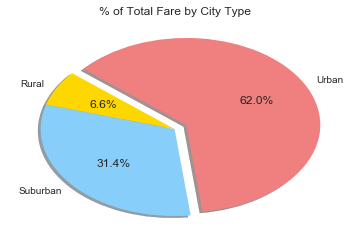

In [49]:
### Pie Chart - % of Total Fares by City Type
total_fares = city_ride_df["fare"].sum()

total_fares_type = city_ride_df.groupby(["type"]).sum()
#total_fares_type

total_fares_type["pct_total_fare"] = (total_fares_type["fare"]/total_fares) * 100

# create pie chart
col_list = pd.DataFrame({"type": total_fares_type.index.values})
col_map = col_list["type"].map({"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"})
explode = [0,0,.1] # PAC MAN NOM NOM NOM NOM

plt.pie(total_fares_type["pct_total_fare"], labels=total_fares_type.index, colors=col_map,
       autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)

#shadow, startangle, and explosion

#print(total_fares_type)
plt.title("% of Total Fare by City Type")
plt.show()


# EVIL PAC MAN NOM NOM NOM NOM

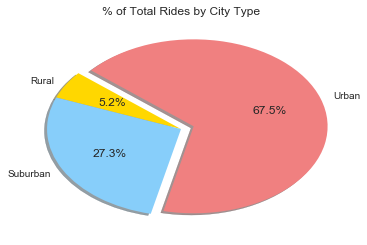

In [50]:
### Pie Chart - % Total Rides by City Type
total_rides = city_ride_df["fare"].count()

total_rides_type = city_ride_df.groupby(["type"]).count()

total_rides_type["pct_total_rides"] = (total_rides_type["fare"]/total_rides) * 100

#total_rides_type

# create pie chart
explode = [0,0,.1]
col_list = pd.DataFrame({"type": total_rides_type.index.values})
col_map = col_list["type"].map({"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"})
plt.pie(total_rides_type["pct_total_rides"], labels=total_rides_type.index, colors=col_map,
       autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)

#print(total_fares_type)
plt.title("% of Total Rides by City Type")
plt.show()

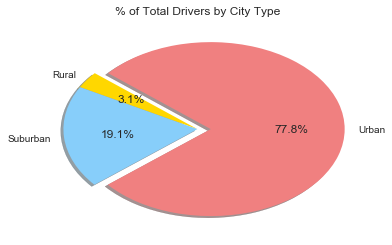

In [51]:
### Pie Chart - % Total Driver by City Type
total_drivers = city_data_df["driver_count"].sum()
total_drivers_type = city_data_df.groupby(["type"]).sum()

total_drivers_type["pct_total_drivers"] = (total_drivers_type["driver_count"]/total_drivers) * 100

#total_drivers_type

# create pie chart
explode = [0,0,.1]
col_list = pd.DataFrame({"type": total_drivers_type.index.values})
col_map = col_list["type"].map({"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"})
plt.pie(total_drivers_type["pct_total_drivers"], labels=total_drivers_type.index, colors=col_map,
       autopct="%1.1f%%", shadow=True, startangle=140, explode=explode)

#print(total_fares_type)
plt.title("% of Total Drivers by City Type")
plt.show()